*Import library's*

In [69]:
import numpy as np
import pandas as pd
from textblob import TextBlob
import tweepy
from os import path
from textblob import TextBlob as tb
from wordcloud import WordCloud,STOPWORDS
stopwords = set(STOPWORDS)
import matplotlib.pyplot as plt
import sys
from importlib import reload
import imp
from textblob.classifiers import NaiveBayesClassifier
import os
import re
import nltk
from nltk import word_tokenize, pos_tag, ne_chunk
from nltk import RegexpParser
from nltk import Tree
from html.parser import HTMLParser
from bs4 import BeautifulSoup

*Twitter authentication*

In [24]:
consumer_key = 'Jg95VukOglg6RIqRrqt6GYRoa'
consumer_secret = 'ZvH3Oz7jFN0OvDMXGtRriTqOOykGnUgqxAU0wNKWhMElII0ivq'
access_token = '971179238396227584-KkOSGzCwhzv0lokz55Dkp1wTjyurnkW'
access_token_secret = 'y2NNUWU1tlhQYMOps49aSKgckRqTu7T7dPWpyNbMeXvAA'

*Twitter API Login*

In [38]:
def get_all_tweets(screen_name):
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    api = tweepy.API(auth)
    alltweets = []
    new_tweets = api.search(screen_name)
    alltweets.extend(new_tweets)
    oldest = alltweets[-1].id - 1
    while len(new_tweets) > 0:
        new_tweets = api.user_timeline(screen_name,count=200,max_id=oldest)
        alltweets.extend(new_tweets)
        oldest = alltweets[-1].id - 1
    outtweets = [[tweet.id_str, tweet.created_at, tweet.text.encode("utf-8")] for tweet in alltweets]
    return outtweets

*Get all tweets*

In [91]:
public_tweets = get_all_tweets('@falanext')
df = pd.DataFrame(public_tweets, columns=['id','created_at','text'])
df

,id,created_at,text
0,1058152496382857217,2018-11-02 00:23:09,b'@danilochapuis @falanext clica no no bot\xc3...
1,1058150723458908161,2018-11-02 00:16:06,b'@falanext \xe2\x80\x9cPoder\xc3\xa1 aceitar\...
2,1058150417346035712,2018-11-02 00:14:53,b'Como abro o chat pelo App ??? @falanext'
3,1058149038854455301,2018-11-02 00:09:24,"b'@falanext Boa noite, quando abri minha conta..."
4,1058137891199696896,2018-11-01 23:25:07,"b'@falanext J\xc3\xa1 olhei no spam, lixo.. Na..."
5,1058137378290892803,2018-11-01 23:23:04,"b'@falanext DM, por favor, t\xc3\xb4 l\xc3\xa1..."
6,1058136116514222080,2018-11-01 23:18:04,b'espero q tenha chegado meu cartao hj @falane...
7,1058125128943460352,2018-11-01 22:34:24,b'@falanext Chamei na DM !!!!'
8,1058115196814848001,2018-11-01 21:54:56,b'@falanext \xf0\x9f\x98\xa9\xf0\x9f\x98\xa9\x...
9,1058104501171838977,2018-11-01 21:12:26,b'@EgonDias @falanext @RogerRomao Ahhahaha'


*Data Cleaning*

In [107]:
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))
def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    # During the letters_only process two lines above, it has created unnecessary white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()
testing = df.text[:3250]
test_result = []
for t in testing:
    test_result.append(tweet_cleaner(t))

In [108]:
data = pd.DataFrame(test_result, columns=['tweet_text'])
data

,tweet_text
0,clica no no bot o do chat
1,poder aceitar vou fazer todo esse role sem ter...
2,como abro o chat pelo app
3,boa noite quando abri minha conta no next n o ...
4,j olhei no spam lixo nada n o foi enviado tem ...
5,dm por favor t l on line
6,espero q tenha chegado meu cartao hj ta difici...
7,chamei na dm
8,ansiedade meus bbs
9,ahhahaha


*Stopwords in portuguese*

In [109]:
stopwords = nltk.corpus.stopwords.words('portuguese')

*Used words*

In [110]:
text = " ".join(tweet for tweet in data.tweet_text)

*WordCloud*

(-0.5, 399.5, 199.5, -0.5)

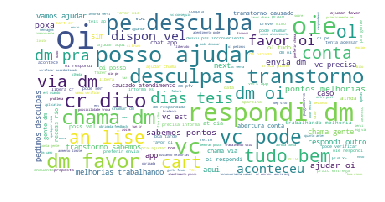

In [111]:
wordcloud = WordCloud(max_font_size=40,stopwords=stopwords,background_color='white').generate(text)
wordcloud.to_file("nouns_user.png")
plt.imshow(wordcloud)
plt.axis("off")

*Counting the words used in the WordCloud*

In [112]:
print ("There are {} words in the combination of all tweets.".format(len(text)))

There are 198198 words in the combination of all tweets.


*ReLi Lexicon - portuguese sentimental analysis*

In [113]:
base_path = 'ReLi-Lex'
train = []
files = [os.path.join(base_path, f) for f in os.listdir(base_path)]

*Read ReLi Lexicon file in directory*

In [114]:
for file in files:
    t = 'pos' if '_Positivos' in file else 'neg'
    with open(file, 'r') as content_file:
        content = content_file.read()
        all = re.findall('\[.*?\]',content)
        for w in all:
            train.append((w[1:-1], t))

cl = NaiveBayesClassifier(train)

*Tweets classification in positives and negatives*

In [100]:
dados = {}
for tweet in public_tweets:
    blob = tb(tweet.text, classifier=cl)
    for s in blob.sentences:
        print("[%s] %s" % (s.classify(), s))

AttributeError: 'list' object has no attribute 'text'

Print das informações em formato de dataframe

Consolidação ou contagem de positivos e negativos

Gráfico da análise de sentimentos, baseado na classificação de Naive-Bayes